# Interpolation of data
- Börge Göbel

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [37]:
def Taylorexp(x, x0, nmax):
    #x: argument , evaluation
    #x0: argument at which derivative will be calculated, expansion
    #namx: n at which series will terminate
    t=0
    for n in range(nmax+1):#starting from 0. nmax+1 will include namx also
        t = t + np.exp(x0)*(x-x0)**n /np.math.factorial(n)
    return t


In [38]:
Taylorexp(1,0,10)

2.7182818011463845

In [39]:
np.exp(1)


2.718281828459045

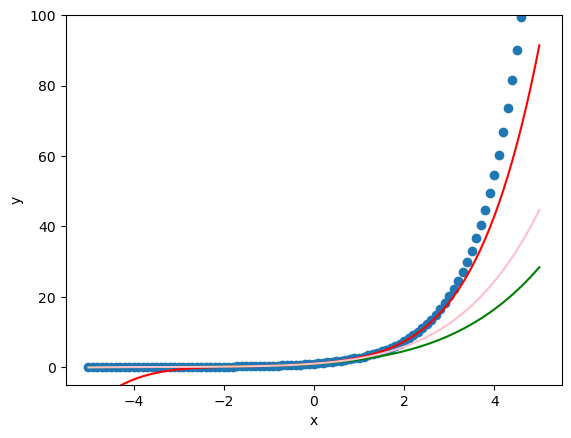

In [40]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

nmax=5
plt.plot(x_list, Taylorexp(x_list, 0, nmax), "red")
plt.plot(x_list, Taylorexp(x_list, -3,nmax),"green")
plt.plot(x_list, Taylorexp(x_list, -2, nmax),"pink")

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [41]:
def sinTaylor(x, nmax):
#no x0 since it is defined at 0 already
    t=0
    for n in range(nmax+1):
        t=t + (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)
    return t

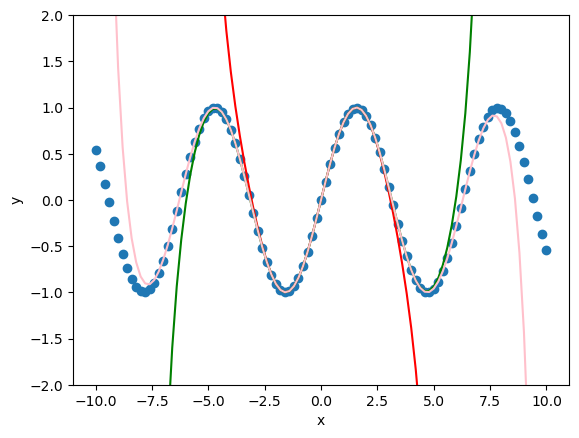

In [42]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])
x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))


plt.plot(x_list, sinTaylor(x_list, 3),"red")
plt.plot(x_list, sinTaylor(x_list, 6),"green")
plt.plot(x_list, sinTaylor(x_list, 9),"pink")

- Accuracy of \\( \sin(10.5) \\)

In [44]:
np.sin(10.5)- 

SyntaxError: invalid syntax (2090386922.py, line 1)

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [45]:
def derivative(f, x, h):
    #f-> function
    #x-> argument of f
    #h-> stepsize
    return(f(x+h)-f(x)) / h

In [46]:
def fun(x):
    return 2*np.sin(x)**2 +x

In [47]:
x0= 10.5
h=0.1

In [48]:
fun(x0)

12.04772926022427

In [49]:
derivative(fun, x0, h)

2.5529969724111723

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [50]:
def nDerivative(f, x, h, n):
    # f: function
    #x: argument of f
    # h: stepsize
    # n: nth derivative 
    t=0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k)) *f(x+k*h)
    return t/ h**n

In [51]:
nDerivative(fun, x0, h, 0)

12.04772926022427

In [52]:
nDerivative(fun, x0, h, 1)

2.5529969724111723

In [53]:
def taylor(f, x, x0, nmax, h):
    t=0
    for n in range(nmax+1):
        t= t + nDerivative(f, x0, h, n)*(x-x0)**n / np.math.factorial(n)
    return t

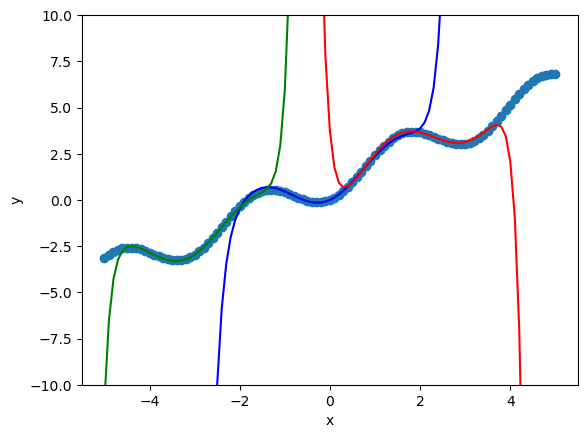

In [54]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-10,10])
x_list = np.linspace(-5, 5, 101)
plt.scatter(x_list, fun(x_list))
nmax=15 #change this value
h=0.05 #change it to find proper fit
plt.plot(x_list, taylor(fun, x_list, 0, nmax, h),"blue")
plt.plot(x_list, taylor(fun, x_list, 2, nmax, h),"Red")
plt.plot(x_list, taylor(fun, x_list, -3, nmax, h), "green")

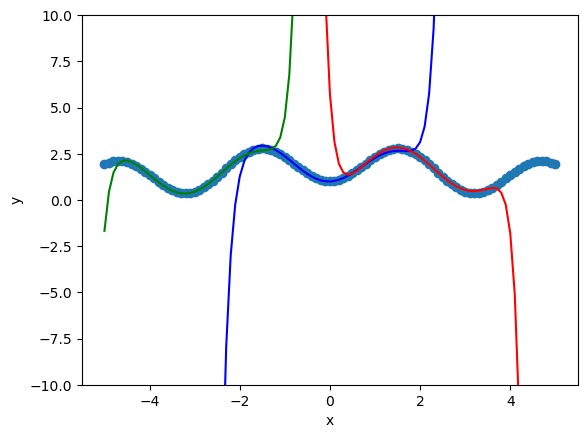

In [55]:
def fun(x):
    return 2*np.sin(x)**2 + np.exp(-0.1*x**2)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-10,10])
x_list = np.linspace(-5, 5, 101)
plt.scatter(x_list, fun(x_list))
nmax=15 #change this value
h=0.05 #change it to find proper fit
plt.plot(x_list, taylor(fun, x_list, 0, nmax, h),"blue")
plt.plot(x_list, taylor(fun, x_list, 2, nmax, h),"Red")
plt.plot(x_list, taylor(fun, x_list, -3, nmax, h), "green")

## 2. Interpolation

### 2.1 Generate data points

In [56]:
def correctFunction(x):
    return 15 + 2.4*x -0.5*x**2 -0.35*x**3

In [57]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])



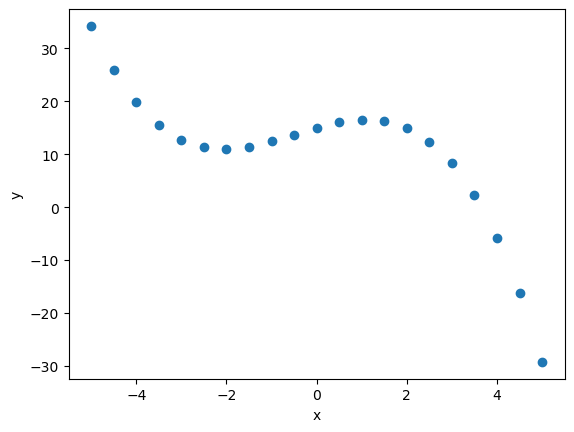

In [58]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0],data0[1]) #shows the datapoints we have generated

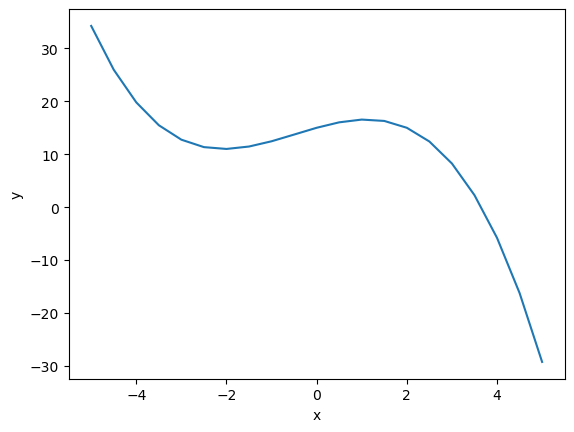

In [59]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data0[0],data0[1]) # plot of our third order polynomial

Modify x and y values by adding random numbers

In [60]:
np.random.rand(npoints) #values from 0 to 1

array([0.46700639, 0.04137911, 0.3046077 , 0.25809087, 0.81916564,
       0.50624775, 0.00909216, 0.4348048 , 0.21092198, 0.76627474,
       0.13892218, 0.37577547, 0.41392935, 0.52414381, 0.73840116,
       0.1645003 , 0.85232619, 0.28154125, 0.2208942 , 0.17400465,
       0.3590272 ])

In [61]:
(2*np.random.rand(npoints)-1) #values in the range -1 to 1

array([-0.01481628, -0.00340506, -0.12050904,  0.54060079,  0.09389827,
        0.15072682,  0.51147975, -0.38432108, -0.9968969 ,  0.26585316,
        0.06667466, -0.78872935, -0.91735194,  0.83570705, -0.50789886,
        0.20574738, -0.67109581,  0.26025938,  0.52271044,  0.53555968,
        0.52278486])

In [62]:
0.1*(2*np.random.rand(npoints)-1) #to scale the values by 0.1 now the range is from -0.1 to 0.1

array([ 0.06077586, -0.09071447,  0.03199226,  0.00072036, -0.0906843 ,
        0.06142367, -0.03733083, -0.08889842, -0.03495291,  0.03048014,
        0.03333698, -0.02910432,  0.07119332, -0.04862005, -0.0567735 ,
       -0.0865445 ,  0.05316544, -0.08555254, -0.06575266,  0.03135519,
       -0.06781902])

In [63]:
data = np.array([data0[0] + 0.25*(2*np.random.rand(npoints)-1), data0[1]+5.0*(2*np.random.rand(npoints)-1)])

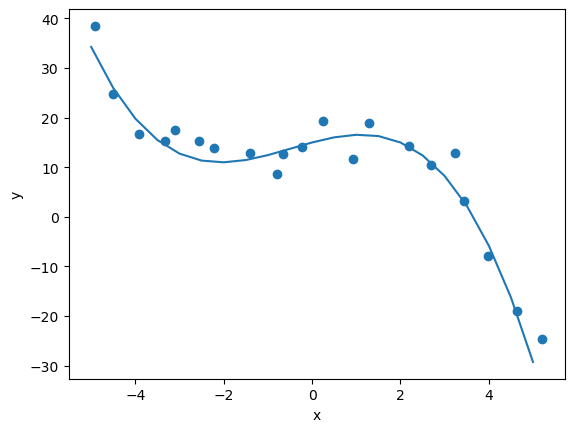

In [64]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data0[0],data0[1]) #function 
plt.scatter(data[0],data[1]) #function drawn using the data points which contain random noises.

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

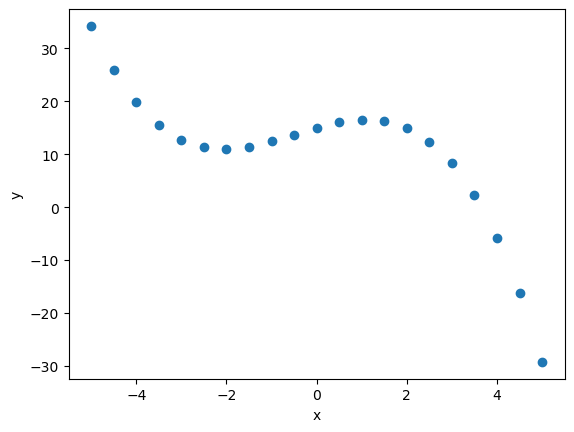

In [65]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0],data0[1])

In [66]:
from scipy import interpolate

- linear splines (the data points are connected by linear lines

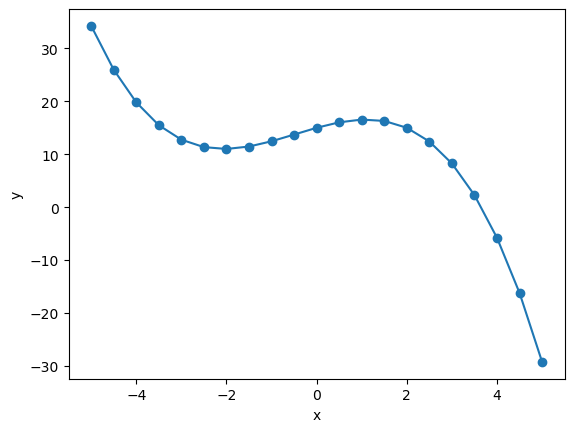

In [67]:
spineLinear0 = interpolate.interp1d(data0[0], data0[1], kind="linear")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0],data0[1])
plt.plot(data0[0], spineLinear0(data0[0]))

- zoom

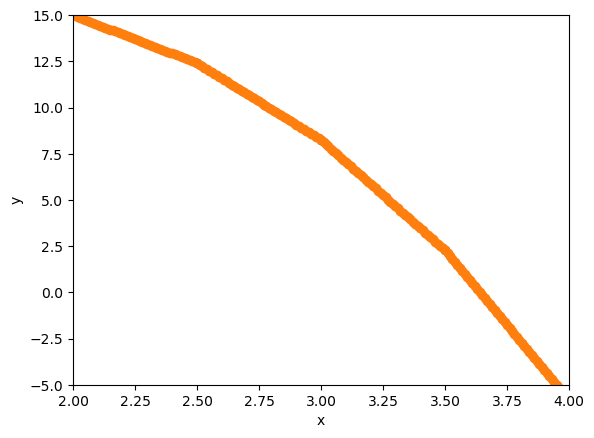

In [68]:
spineLinear0 = interpolate.interp1d(data0[0], data0[1], kind="linear")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

#to increase the resolution, increase the number of datapoints
x_list = np.linspace(2,4,201)
#plt.plot(data0[0], spineLinear0(data0[0]))
plt.scatter(x_list, spineLinear0(x_list))

- cubic spline (the lines connecting will be smooth)


NameError: name 'spineCubic0' is not defined

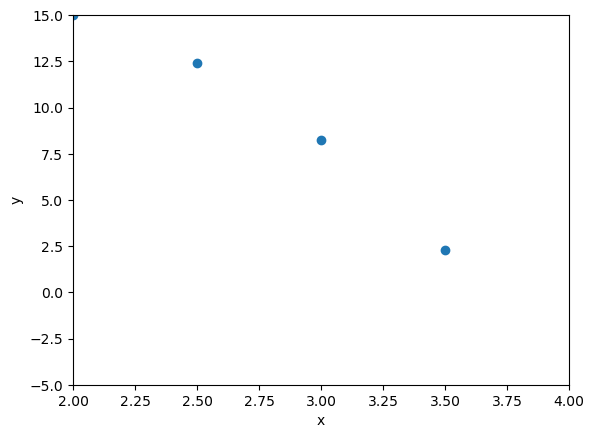

In [69]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind="cubic")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])
x_list = np.linspace(2,4,201)
plt.plot(x_list, spineCubic0(x_list))

### 2.2.2 Perturbed data

In [ ]:
splineCubic = interpolate.interp1d(data[0], data[1], kind="cubic")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data0[0], data0[1]) #unperturbed data
plt.scatter(data[0], data[1]) #perturbed data
x_list= np.linspace(-4.5, 4.5, 901)
plt.plot(x_list, splineCubic(x_list)) #spline function of perturbed data

- How to handle data which is not smooth?

In [ ]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(100) #increase the smoothing factor to get an even smoother plot

In [ ]:
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(data[0], data[1])
x_list = np.linspace(-4.5, 4.5, 901)
plt.plot(x_list, splineCubic(x_list), "red")
plt.plot(x_list, splineSmooth(x_list))

## How you can always fit a data with polynomials?

In [73]:
datapoly = data[:,7:14]

In [74]:
datapoly

array([[-1.39786637, -0.79073937, -0.65253735, -0.22537276,  0.25094968,
         0.9237099 ,  1.28711988],
       [12.93339017,  8.57064189, 12.60116357, 14.00186461, 19.37434789,
        11.66568391, 19.00843729]])

since we have 7 data points, we need a 6th order polynomial for perfect interpolation

In [75]:
x = np.transpose(
        np.array(
            [datapoly[0,:]**0, datapoly[0,:]**1, datapoly[0,:]**2, datapoly[0,:]**3, datapoly[0,:]**4, datapoly[0,:]**5, datapoly[0,:]**6]
                )
    )

In [76]:
x #first entry is 1

array([[ 1.00000000e+00, -1.39786637e+00,  1.95403040e+00,
        -2.73147339e+00,  3.81823480e+00, -5.33738204e+00,
         7.46094687e+00],
       [ 1.00000000e+00, -7.90739374e-01,  6.25268757e-01,
        -4.94424625e-01,  3.90961018e-01, -3.09148271e-01,
         2.44455710e-01],
       [ 1.00000000e+00, -6.52537355e-01,  4.25805000e-01,
        -2.77853668e-01,  1.81309898e-01, -1.18311481e-01,
         7.72026609e-02],
       [ 1.00000000e+00, -2.25372763e-01,  5.07928823e-02,
        -1.14473322e-02,  2.57991689e-03, -5.81442999e-04,
         1.31041415e-04],
       [ 1.00000000e+00,  2.50949681e-01,  6.29757426e-02,
         1.58037425e-02,  3.96594416e-03,  9.95252423e-04,
         2.49758278e-04],
       [ 1.00000000e+00,  9.23709899e-01,  8.53239977e-01,
         7.88146212e-01,  7.28018458e-01,  6.72477856e-01,
         6.21174452e-01],
       [ 1.00000000e+00,  1.28711988e+00,  1.65667759e+00,
         2.13234266e+00,  2.74458063e+00,  3.53260430e+00,
         4.5468852

In [78]:
y = datapoly[1,:]

In [79]:
a= np.linalg.solve(x,y)

In [80]:
a

array([ 15.0882148 ,  11.49192768,  30.16743579, -14.04479629,
       -73.36270504,   7.45234017,  31.6970895 ])

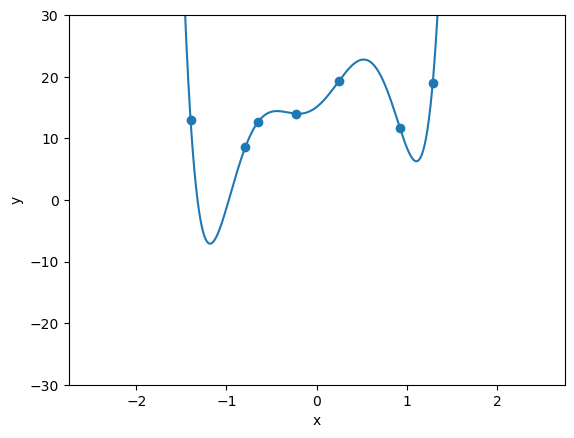

In [82]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-30, 30])

x_list = np.linspace(-2.5, 2.5, 901)
y_list= a[0]*x_list**0 + a[1]*x_list**1 + a[2]* x_list**2 + a[3]*x_list**3 + a[4]*x_list**4 + a[5]*x_list**5 +a[6]*x_list**6
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_list)

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

In [86]:
def polynomialModel(x,a):
    t=0
    for k in range(len(a)): #if the given polynomial has 5 terms, then a=5 and the loop will run for 5 times. 
        t = t+ a[k] * x**k
    return t


In [87]:
a0 =  np.array([-2, 2.4, -0.5, -0.35])


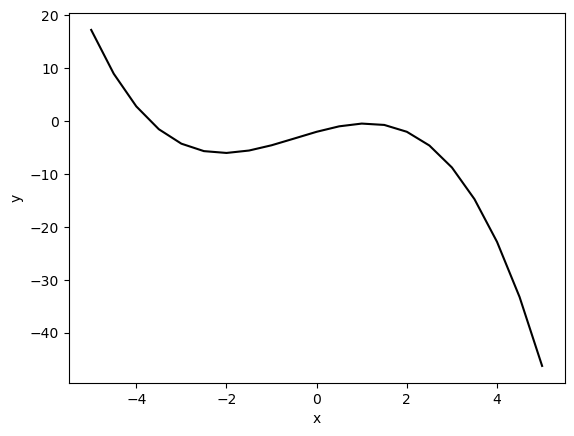

In [88]:
plt.xlabel('x')
plt.ylabel('y')

x_list =  np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a0), "black")

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

In [95]:
def errorFit(f, coefficient, data):
    #f: the fit function
    #coefficient: the ai values we try to optimize
    #data: the data we try to fit
    error = 0
    for i in range(len(data[0])):
        error = error +  (data[1,i]- f(data[0,i], coefficient))**2
        #print(error)
    return error

In [96]:
errorFit(polynomialModel, a0, data)

7334.626636775195

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

### 2.3.4 Loop for the actual fitting

- Comparison of a and a0